In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [6]:
df = pd.read_csv("PJME_hourly.csv")
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [8]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime')

In [9]:
df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month
df['weekday'] = df['Datetime'].dt.weekday

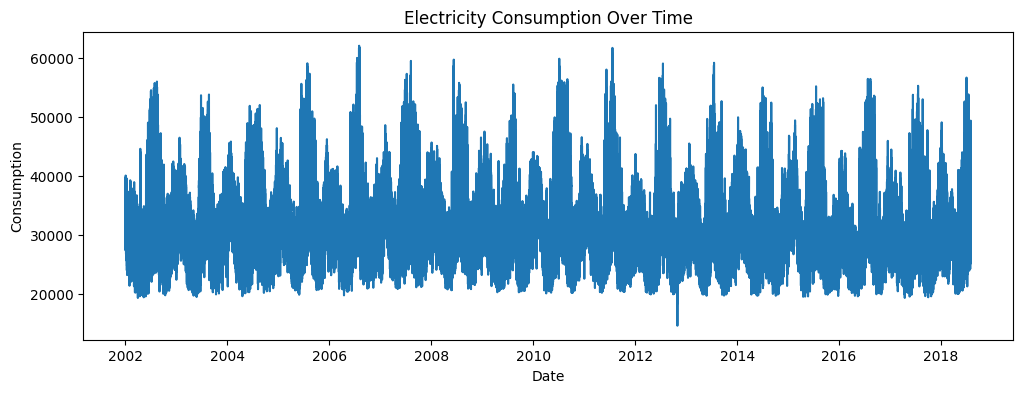

In [10]:
plt.figure(figsize=(12,4))
plt.plot(df['Datetime'], df.iloc[:,1])
plt.title("Electricity Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.show()

In [11]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime')

df.head()

,Datetime,PJME_MW,hour,day,month,weekday
8734,2002-01-01 01:00:00,30393.0,1,1,1,1
8735,2002-01-01 02:00:00,29265.0,2,1,1,1
8736,2002-01-01 03:00:00,28357.0,3,1,1,1
8737,2002-01-01 04:00:00,27899.0,4,1,1,1
8738,2002-01-01 05:00:00,28057.0,5,1,1,1


In [12]:
df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month
df['weekday'] = df['Datetime'].dt.weekday

In [13]:
df[['Datetime', 'PJME_MW', 'hour', 'day', 'month', 'weekday']].head()

,Datetime,PJME_MW,hour,day,month,weekday
8734,2002-01-01 01:00:00,30393.0,1,1,1,1
8735,2002-01-01 02:00:00,29265.0,2,1,1,1
8736,2002-01-01 03:00:00,28357.0,3,1,1,1
8737,2002-01-01 04:00:00,27899.0,4,1,1,1
8738,2002-01-01 05:00:00,28057.0,5,1,1,1


In [14]:
X = df[['hour', 'day', 'month', 'weekday']]
y = df['PJME_MW']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [17]:
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression MAE:", mae)
print("Linear Regression RMSE:", rmse)

Linear Regression MAE: 4732.66415797234
Linear Regression RMSE: 5778.63398538654


In [18]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [19]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest MAE: 3300.03546735825
Random Forest RMSE: 4299.283892382916


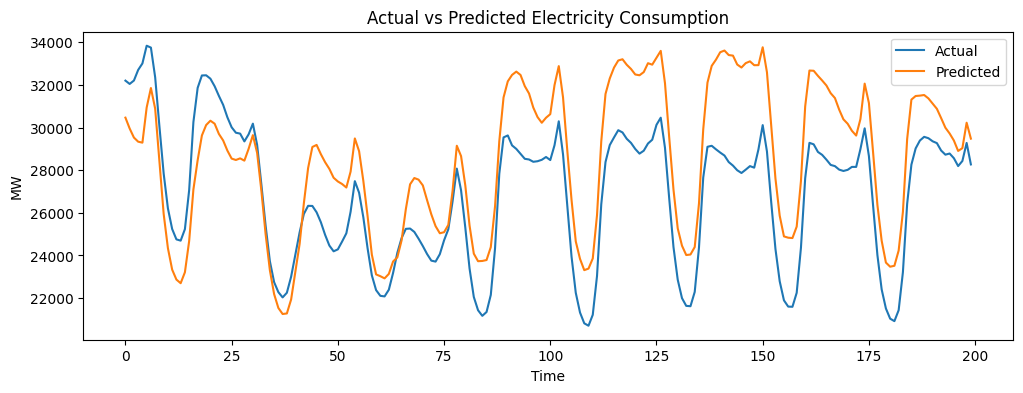

In [20]:
plt.figure(figsize=(12,4))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(y_pred_rf[:200], label="Predicted")
plt.title("Actual vs Predicted Electricity Consumption")
plt.xlabel("Time")
plt.ylabel("MW")
plt.legend()
plt.show()

In [21]:
importances = rf.feature_importances_
features = X.columns

fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

fi_df

,Feature,Importance
0,hour,0.446978
2,month,0.302363
1,day,0.128513
3,weekday,0.122146


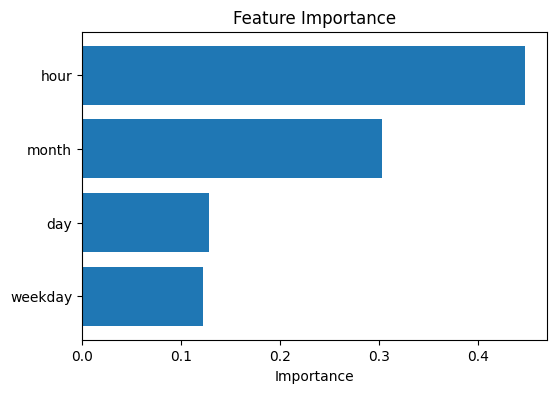

In [22]:
plt.figure(figsize=(6,4))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [23]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

mae_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf = RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)

    mae_scores.append(mean_absolute_error(y_test, preds))

np.mean(mae_scores)


np.float64(2974.3300170342236)

## Project Summary

This project focuses on forecasting hourly electricity consumption using historical time-series data.

Key steps included:
- Data cleaning and exploratory data analysis
- Feature engineering based on temporal attributes
- Baseline modeling with Linear Regression
- Performance improvement using Random Forest
- Model evaluation using MAE, RMSE, and time-series cross-validation

The final model successfully captured non-linear consumption patterns and demonstrated improved accuracy, making it suitable for demand forecasting and capacity planning use cases.